<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Initial-Data-Processing-&amp;-Visualizations" data-toc-modified-id="Initial-Data-Processing-&amp;-Visualizations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Data Processing &amp; Visualizations</a></span><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Set Up</a></span><ul class="toc-item"><li><span><a href="#Imports-and-Functions" data-toc-modified-id="Imports-and-Functions-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Imports and Functions</a></span></li><li><span><a href="#Isolating-Areas-of-Interest" data-toc-modified-id="Isolating-Areas-of-Interest-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Isolating Areas of Interest</a></span></li></ul></li><li><span><a href="#Existing-Rooftop-Solar-Installations" data-toc-modified-id="Existing-Rooftop-Solar-Installations-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Existing Rooftop Solar Installations</a></span><ul class="toc-item"><li><span><a href="#Basic-Metrics-Bar-Plots" data-toc-modified-id="Basic-Metrics-Bar-Plots-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Basic Metrics Bar Plots</a></span></li><li><span><a href="#Maps" data-toc-modified-id="Maps-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Maps</a></span></li></ul></li><li><span><a href="#Rooftops" data-toc-modified-id="Rooftops-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Rooftops</a></span><ul class="toc-item"><li><span><a href="#Processing-Tax-Parcel-Data" data-toc-modified-id="Processing-Tax-Parcel-Data-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Processing Tax Parcel Data</a></span></li><li><span><a href="#Isolating-Residential-Rooftops" data-toc-modified-id="Isolating-Residential-Rooftops-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Isolating Residential Rooftops</a></span></li></ul></li><li><span><a href="#Solar-Potential" data-toc-modified-id="Solar-Potential-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Solar Potential</a></span><ul class="toc-item"><li><span><a href="#How-the-Towns-Compare-Overall" data-toc-modified-id="How-the-Towns-Compare-Overall-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>How the Towns Compare Overall</a></span></li><li><span><a href="#Adding-a-Rooftop-Layer" data-toc-modified-id="Adding-a-Rooftop-Layer-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Adding a Rooftop Layer</a></span></li><li><span><a href="#Solar-Energy-Potential-per-Rooftop" data-toc-modified-id="Solar-Energy-Potential-per-Rooftop-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Solar Energy Potential per Rooftop</a></span></li></ul></li><li><span><a href="#Financial-Data" data-toc-modified-id="Financial-Data-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Financial Data</a></span><ul class="toc-item"><li><span><a href="#Block-Group-Income-Data-for-Areas-of-Interest" data-toc-modified-id="Block-Group-Income-Data-for-Areas-of-Interest-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Block Group Income Data for Areas of Interest</a></span></li><li><span><a href="#From-Income-Ranges-to-Weighted-Averages" data-toc-modified-id="From-Income-Ranges-to-Weighted-Averages-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>From Income Ranges to Weighted Averages</a></span></li><li><span><a href="#State-&amp;-Federal-Income-Tax-Estimates" data-toc-modified-id="State-&amp;-Federal-Income-Tax-Estimates-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>State &amp; Federal Income Tax Estimates</a></span></li><li><span><a href="#Visualizing-Financial-Data" data-toc-modified-id="Visualizing-Financial-Data-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Visualizing Financial Data</a></span></li><li><span><a href="#Combining-Block-Groups-&amp;-Rooftop-Irradiance-Data" data-toc-modified-id="Combining-Block-Groups-&amp;-Rooftop-Irradiance-Data-2.5.5"><span class="toc-item-num">2.5.5&nbsp;&nbsp;</span>Combining Block Groups &amp; Rooftop Irradiance Data</a></span></li></ul></li><li><span><a href="#Avoided-Emissions" data-toc-modified-id="Avoided-Emissions-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Avoided Emissions</a></span></li></ul></li></ul></div>

## Background

## Initial Data Processing & Visualizations

### Set Up

#### Imports and Functions

In [2]:
# Define functions for data & viz output locations

def dataDir(x):
    return '/home/lucia/bu/year4/semester1/EE508/project/ma-solar/data/' + x

def outputDir(x):
    return '/home/lucia/bu/year4/semester1/EE508/project/ma-solar/output/' + x

In [3]:
# Import libraries

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import agate
import agatedbf
# import rioxarray as rxr                  # contextlib error
from rasterstats import zonal_stats
from rasterio import open as r_open
from rasterio.plot import show as r_show 
from subprocess import Popen
# from qgis import processing

%matplotlib inline

#### Isolating Areas of Interest

In [4]:
# Read MA zip codes shape file

zipsMA = gpd.read_file(dataDir('MAshape/ZIPCODES_NT_POLY.shp'))
zipsMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
0,01331,ATHOL,NON UNIQUE,ATHOL,02515,"ATHOL, TOWN OF",WORCESTER,58.084870,1.504391e+08,66459.581259,"POLYGON ((147583.601 930766.133, 147572.846 93..."
1,01085,WESTFIELD,NON UNIQUE,WESTFIELD,76030,WESTFIELD,HAMPDEN,55.938928,1.448812e+08,61329.577100,"POLYGON ((101952.244 882113.238, 101989.263 88..."
2,01370,SHELBURNE FALLS,NON UNIQUE,SHELBURNE FALLS,61205,"SHELBURNE, TOWN OF",FRANKLIN,48.804057,1.264019e+08,70885.011312,"POLYGON ((107090.967 933358.562, 106787.233 93..."
3,01235,HINSDALE,NON UNIQUE,HINSDALE,30280,"HINSDALE, TOWN OF",BERKSHIRE,47.757052,1.236902e+08,49286.404925,"POLYGON ((77728.642 914027.911, 77229.987 9120..."
4,02747,NORTH DARTMOUTH,NON UNIQUE,NORTH DARTMOUTH,47450,"DARTMOUTH, TOWN OF",BRISTOL,47.495414,1.230126e+08,66614.835420,"POLYGON ((242894.990 830521.900, 242901.505 83..."
...,...,...,...,...,...,...,...,...,...,...,...
544,01107,SPRINGFIELD,NON UNIQUE,SPRINGFIELD,67000,SPRINGFIELD,HAMPDEN,1.498634,3.881445e+06,10376.718676,"POLYGON ((107846.667 873744.759, 107748.271 87..."
545,02143,SOMERVILLE,NON UNIQUE,SOMERVILLE,62535,SOMERVILLE,MIDDLESEX,1.496683,3.876392e+06,10257.447499,"POLYGON ((234515.542 903600.882, 234513.546 90..."
546,02126,MATTAPAN,NON UNIQUE,MATTAPAN,07000,BOSTON,SUFFOLK,1.913063,4.954811e+06,11393.855139,"POLYGON ((235583.548 891243.299, 235517.614 89..."
547,02723,FALL RIVER,NON UNIQUE,FALL RIVER,23000,FALL RIVER,BRISTOL,1.848472,4.787521e+06,10099.578308,"POLYGON ((231623.910 825614.571, 231616.540 82..."


In [5]:
# Isolate Newton, Milton, Hyde Park, and West Roxbury

isolMA = zipsMA.loc[(zipsMA['PC_NAME'].isin(['MILTON', 'HYDE PARK', 'WEST ROXBURY'])) |
                   (zipsMA['CITY_TOWN'].eq('NEWTON'))]
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
185,02459,NEWTON CENTER,NON UNIQUE,NEWTON CENTER,45595,NEWTON,MIDDLESEX,5.098405,1.320481e+07,23530.272038,"POLYGON ((226494.628 898991.424, 226504.878 89..."
210,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.440987,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
310,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.297527,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
381,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,"MILTON, TOWN OF",NORFOLK,0.005897,1.527350e+04,589.520682,"POLYGON ((230945.491 887514.788, 230937.212 88..."
446,02465,WEST NEWTON,NON UNIQUE,WEST NEWTON,77185,NEWTON,MIDDLESEX,2.132747,5.523790e+06,11770.303900,"POLYGON ((223613.337 898621.714, 223571.372 89..."
450,02466,AUBURNDALE,NON UNIQUE,AUBURNDALE,02830,NEWTON,MIDDLESEX,1.748247,4.527939e+06,14172.011520,"POLYGON ((221939.383 898695.155, 221585.326 89..."
454,02460,NEWTONVILLE,NON UNIQUE,NEWTONVILLE,45735,NEWTON,MIDDLESEX,1.394419,3.611529e+06,12096.428707,"POLYGON ((224343.452 901722.148, 224387.622 90..."
462,02461,NEWTON HIGHLANDS,NON UNIQUE,NEWTON HIGHLANDS,45630,NEWTON,MIDDLESEX,1.388591,3.596435e+06,10640.922952,"POLYGON ((223910.022 894739.485, 223955.440 89..."
495,02462,NEWTON LOWER FALLS,NON UNIQUE,NEWTON LOWER FALLS,45665,NEWTON,MIDDLESEX,0.586958,1.520215e+06,9916.529321,"MULTIPOLYGON (((220422.631 898565.067, 220408...."


<AxesSubplot:>

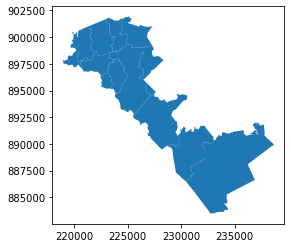

In [6]:
# Plot the areas

isolMA.plot()

In [7]:
# Create unions of the multiple polygons in Newton, Hyde Park, and Milton

milton1 = isolMA.loc[310, 'geometry'][0]
milton2 = isolMA.loc[310, 'geometry'][1]

polyNewton = gpd.GeoDataFrame(geometry=isolMA[isolMA['CITY_TOWN'].eq('NEWTON')]['geometry'])
polyMilton = gpd.GeoDataFrame(geometry=[milton1, milton2])
polyHP     = gpd.GeoDataFrame(geometry=isolMA[isolMA['PC_NAME'].eq('HYDE PARK')]['geometry'])

polyNewton = polyNewton.set_index(pd.Index([i for i in range(len(polyNewton))]))
polyMilton = polyMilton.set_index(pd.Index([0, 1]))
polyHP     = polyHP.set_index(pd.Index([0, 1]))

polyNewton = polyNewton['geometry']
polyMilton = polyMilton['geometry']
polyHP     = polyHP['geometry']

In [8]:
def polyUnion(polyList):
    
    res = polyList.loc[0]
    
    for i in range(1, len(polyList)):
        res = res.union(polyList.loc[i])
        
    return res

In [9]:
newtonAll = polyUnion(polyNewton)
newton    = ['02456', 'NEWTON', 'AGG', 'NEWTON', 'NA', 'NEWTON', 'MIDDLESEX', 
            'NA', newtonAll.area, newtonAll.length, newtonAll]


isolMA.loc[0] = newton
isolMA

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
185,02459,NEWTON CENTER,NON UNIQUE,NEWTON CENTER,45595,NEWTON,MIDDLESEX,5.0984,1.320481e+07,23530.272038,"POLYGON ((226494.628 898991.424, 226504.878 89..."
210,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.44099,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
310,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.2975,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
381,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,"MILTON, TOWN OF",NORFOLK,0.00589713,1.527350e+04,589.520682,"POLYGON ((230945.491 887514.788, 230937.212 88..."
446,02465,WEST NEWTON,NON UNIQUE,WEST NEWTON,77185,NEWTON,MIDDLESEX,2.13275,5.523790e+06,11770.303900,"POLYGON ((223613.337 898621.714, 223571.372 89..."
450,02466,AUBURNDALE,NON UNIQUE,AUBURNDALE,02830,NEWTON,MIDDLESEX,1.74825,4.527939e+06,14172.011520,"POLYGON ((221939.383 898695.155, 221585.326 89..."
454,02460,NEWTONVILLE,NON UNIQUE,NEWTONVILLE,45735,NEWTON,MIDDLESEX,1.39442,3.611529e+06,12096.428707,"POLYGON ((224343.452 901722.148, 224387.622 90..."
462,02461,NEWTON HIGHLANDS,NON UNIQUE,NEWTON HIGHLANDS,45630,NEWTON,MIDDLESEX,1.38859,3.596435e+06,10640.922952,"POLYGON ((223910.022 894739.485, 223955.440 89..."
495,02462,NEWTON LOWER FALLS,NON UNIQUE,NEWTON LOWER FALLS,45665,NEWTON,MIDDLESEX,0.586958,1.520215e+06,9916.529321,"MULTIPOLYGON (((220422.631 898565.067, 220408...."


In [10]:
miltonAll = polyUnion(polyMilton)
milton    = ['02186', 'MILTON', 'AGG', 'NEWTON', 'NA', 'MILTON, TOWN OF', 
             'NORFOLK', 'NA', miltonAll.area, miltonAll.length, miltonAll]


isolMA.loc[1] = milton
isolMA

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
185,02459,NEWTON CENTER,NON UNIQUE,NEWTON CENTER,45595,NEWTON,MIDDLESEX,5.0984,1.320481e+07,23530.272038,"POLYGON ((226494.628 898991.424, 226504.878 89..."
210,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.44099,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
310,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.2975,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
381,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,"MILTON, TOWN OF",NORFOLK,0.00589713,1.527350e+04,589.520682,"POLYGON ((230945.491 887514.788, 230937.212 88..."
446,02465,WEST NEWTON,NON UNIQUE,WEST NEWTON,77185,NEWTON,MIDDLESEX,2.13275,5.523790e+06,11770.303900,"POLYGON ((223613.337 898621.714, 223571.372 89..."
450,02466,AUBURNDALE,NON UNIQUE,AUBURNDALE,02830,NEWTON,MIDDLESEX,1.74825,4.527939e+06,14172.011520,"POLYGON ((221939.383 898695.155, 221585.326 89..."
454,02460,NEWTONVILLE,NON UNIQUE,NEWTONVILLE,45735,NEWTON,MIDDLESEX,1.39442,3.611529e+06,12096.428707,"POLYGON ((224343.452 901722.148, 224387.622 90..."
462,02461,NEWTON HIGHLANDS,NON UNIQUE,NEWTON HIGHLANDS,45630,NEWTON,MIDDLESEX,1.38859,3.596435e+06,10640.922952,"POLYGON ((223910.022 894739.485, 223955.440 89..."
495,02462,NEWTON LOWER FALLS,NON UNIQUE,NEWTON LOWER FALLS,45665,NEWTON,MIDDLESEX,0.586958,1.520215e+06,9916.529321,"MULTIPOLYGON (((220422.631 898565.067, 220408...."


In [11]:
hydeAll = polyUnion(polyHP)
hyde    = ['02136', 'HYDE PARK', 'AGG', 'HYDE PARK', 'NA', 'BOSTON', 'SUFFOLK', 
            'NA', hydeAll.area, hydeAll.length, hydeAll]


isolMA.loc[2] = hyde
isolMA

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
185,02459,NEWTON CENTER,NON UNIQUE,NEWTON CENTER,45595,NEWTON,MIDDLESEX,5.0984,1.320481e+07,23530.272038,"POLYGON ((226494.628 898991.424, 226504.878 89..."
210,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,BOSTON,SUFFOLK,4.44099,1.150210e+07,19976.953687,"POLYGON ((232240.744 891613.733, 232285.605 89..."
310,02186,MILTON,NON UNIQUE,MILTON,41725,"MILTON, TOWN OF",NORFOLK,13.2975,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
381,02136,HYDE PARK,NON UNIQUE,HYDE PARK,31960,"MILTON, TOWN OF",NORFOLK,0.00589713,1.527350e+04,589.520682,"POLYGON ((230945.491 887514.788, 230937.212 88..."
446,02465,WEST NEWTON,NON UNIQUE,WEST NEWTON,77185,NEWTON,MIDDLESEX,2.13275,5.523790e+06,11770.303900,"POLYGON ((223613.337 898621.714, 223571.372 89..."
450,02466,AUBURNDALE,NON UNIQUE,AUBURNDALE,02830,NEWTON,MIDDLESEX,1.74825,4.527939e+06,14172.011520,"POLYGON ((221939.383 898695.155, 221585.326 89..."
454,02460,NEWTONVILLE,NON UNIQUE,NEWTONVILLE,45735,NEWTON,MIDDLESEX,1.39442,3.611529e+06,12096.428707,"POLYGON ((224343.452 901722.148, 224387.622 90..."
462,02461,NEWTON HIGHLANDS,NON UNIQUE,NEWTON HIGHLANDS,45630,NEWTON,MIDDLESEX,1.38859,3.596435e+06,10640.922952,"POLYGON ((223910.022 894739.485, 223955.440 89..."
495,02462,NEWTON LOWER FALLS,NON UNIQUE,NEWTON LOWER FALLS,45665,NEWTON,MIDDLESEX,0.586958,1.520215e+06,9916.529321,"MULTIPOLYGON (((220422.631 898565.067, 220408...."


In [12]:
isolMA = isolMA.drop([185, 210, 310, 381, 446, 450, 454, 462, 495, 500, 536, 541, 543])

In [13]:
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
0,02456,NEWTON,AGG,NEWTON,NA,NEWTON,MIDDLESEX,NA,4.642158e+07,39827.270302,"POLYGON ((226479.461 896012.738, 226638.357 89..."
1,02186,MILTON,AGG,NEWTON,NA,"MILTON, TOWN OF",NORFOLK,NA,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
2,02136,HYDE PARK,AGG,HYDE PARK,NA,BOSTON,SUFFOLK,NA,1.151738e+07,19882.474830,"POLYGON ((232240.744 891613.733, 232285.605 89..."


In [113]:
# Save to file

isolMA.to_file(dataDir('analysisReady/isolMA.shp'))

### Existing Rooftop Solar Installations

In [27]:
# Read the data into pandas (source: Massachusetts Clean Energy Center)

existPV = pd.read_csv(dataDir('existingPV/existingPVStudyLocations.csv'))
existPV

,capacity_kWDC,dateInService,totalCostwDesignFees,totalGrant,city,zip,county,programName,facilityType,utility,3rdPartyOwned,SREC_eligible,estAnnualProduction_kWh
0,11.16,03/08/21,33850.00,0.0,Newton,2465,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,9147.0
1,5.52,02/23/21,28648.80,0.0,Newton,2460,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5683.0
2,6.21,02/23/21,18925.25,0.0,Newton,2466,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,6652.0
3,6.64,02/23/21,26988.00,0.0,Newton,2459,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5225.0
4,12.96,02/22/21,42666.00,0.0,Newton,2468,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,11835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,4.41,05/29/13,24653.00,1764.0,Boston,2132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,5343.0
1037,5.64,02/28/12,28679.00,8500.0,Boston,2132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,6821.0
1038,7.05,11/30/11,39835.00,4250.0,Boston,2132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,8129.0
1039,2.52,05/30/07,22653.00,6300.0,Boston,2132,Suffolk,Small Renewables Initiative,Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,2942.0


In [28]:
# Need to append '0' to each zipcode entry

existPV['zip'] = '0' + existPV['zip'].astype(str)
existPV

,capacity_kWDC,dateInService,totalCostwDesignFees,totalGrant,city,zip,county,programName,facilityType,utility,3rdPartyOwned,SREC_eligible,estAnnualProduction_kWh
0,11.16,03/08/21,33850.00,0.0,Newton,02465,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,9147.0
1,5.52,02/23/21,28648.80,0.0,Newton,02460,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5683.0
2,6.21,02/23/21,18925.25,0.0,Newton,02466,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,6652.0
3,6.64,02/23/21,26988.00,0.0,Newton,02459,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5225.0
4,12.96,02/22/21,42666.00,0.0,Newton,02468,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,11835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,4.41,05/29/13,24653.00,1764.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,5343.0
1037,5.64,02/28/12,28679.00,8500.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,6821.0
1038,7.05,11/30/11,39835.00,4250.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,8129.0
1039,2.52,05/30/07,22653.00,6300.0,Boston,02132,Suffolk,Small Renewables Initiative,Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,2942.0


In [29]:
# Some installations received state grants or other incentives, 
# reducing the final cost to the household

existPV['finalCost'] = existPV['totalCostwDesignFees'] - existPV['totalGrant']
existPV

,capacity_kWDC,dateInService,totalCostwDesignFees,totalGrant,city,zip,county,programName,facilityType,utility,3rdPartyOwned,SREC_eligible,estAnnualProduction_kWh,finalCost
0,11.16,03/08/21,33850.00,0.0,Newton,02465,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,9147.0,33850.00
1,5.52,02/23/21,28648.80,0.0,Newton,02460,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5683.0,28648.80
2,6.21,02/23/21,18925.25,0.0,Newton,02466,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,6652.0,18925.25
3,6.64,02/23/21,26988.00,0.0,Newton,02459,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,5225.0,26988.00
4,12.96,02/22/21,42666.00,0.0,Newton,02468,Middlesex,Solar Massachusetts Renewable Target (SMART),Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,11835.0,42666.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,4.41,05/29/13,24653.00,1764.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,5343.0,22889.00
1037,5.64,02/28/12,28679.00,8500.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,6821.0,20179.00
1038,7.05,11/30/11,39835.00,4250.0,Boston,02132,Suffolk,Commonwealth Solar II,Commonwealth Solar SREC I,NSTAR (DBA EverSource),N,Y,8129.0,35585.00
1039,2.52,05/30/07,22653.00,6300.0,Boston,02132,Suffolk,Small Renewables Initiative,Residential (3 or fewer dwelling units per bui...,NSTAR (DBA EverSource),N,N,2942.0,16353.00


In [34]:
def extract_exist_PV_PC_name(data, PCName):
    
    solarTown = data[data['city'] == PCName]
    
    # Metrics for graphing
    
    N            = len(solarTown)
    sumkWcap     = sum(solarTown['capacity_kWDC'])
    sumListCost  = sum(solarTown['totalCostwDesignFees'])
    avgListCost  = solarTown['totalCostwDesignFees'].mean()
    sumGrant     = sum(solarTown['totalGrant'])
    avgGrant     = solarTown['totalGrant'].mean()
    sumFinalCost = sum(solarTown['finalCost'])
    avgFinalCost = solarTown['finalCost'].mean()
    sumkWhProd    = sum(solarTown['estAnnualProduction_kWh'])
    
    return( {'N': N,
             'sumkWcap': round(sumkWcap, 2),
             'sumListCost': round(sumListCost, 2),
             'avgListCost': round(avgListCost, 2),
             'sumGrant': round(sumGrant, 2),
             'avgGrant': round(avgGrant, 2),
             'sumFinalCost': round(sumFinalCost, 2),
             'avgFinalCost': round(avgFinalCost, 2),
             'sumkWhProd': round(sumkWhProd, 2)
            })

In [35]:
def extract_exist_PV_zip(data, zipcode):
    
    solarZip = data[data['zip'] == zipcode]
    
    # Metrics for graphing
    
    N            = len(solarZip)
    sumkWcap     = sum(solarZip['capacity_kWDC'])
    sumListCost  = sum(solarZip['totalCostwDesignFees'])
    avgListCost  = solarZip['totalCostwDesignFees'].mean()
    sumGrant     = sum(solarZip['totalGrant'])
    avgGrant     = solarZip['totalGrant'].mean()
    sumFinalCost = sum(solarZip['finalCost'])
    avgFinalCost = solarZip['finalCost'].mean()
    sumkWhProd    = sum(solarZip['estAnnualProduction_kWh'])
    
    return( {'N': N,
             'sumkWcap': round(sumkWcap, 2),
             'sumListCost': round(sumListCost, 2),
             'avgListCost': round(avgListCost, 2),
             'sumGrant': round(sumGrant, 2),
             'avgGrant': round(avgGrant, 2),
             'sumFinalCost': round(sumFinalCost, 2),
             'avgFinalCost': round(avgFinalCost, 2),
             'sumkWhProd': round(sumkWhProd, 2)
            })

In [36]:
# Extract the solar units already installed in Newton and Milton

PVN = extract_exist_PV_PC_name(existPV, 'Newton')
PVM = extract_exist_PV_PC_name(existPV, 'Milton')

# Extract the solar units already installed in West Roxbury and Hyde Park

PVW = extract_exist_PV_zip(existPV, '02132')
PVH = extract_exist_PV_zip(existPV, '02136')

# Combine these into a dataframe & set the index correctly

existPVSummary = pd.DataFrame.from_dict([PVN, PVM, PVW, PVH])
existPVSummary = existPVSummary.set_index(pd.Index(['Newton', 'Milton', 
                                                    'West Roxbury', 
                                                    'Hyde Park']))
existPVSummary

,N,sumkWcap,sumListCost,avgListCost,sumGrant,avgGrant,sumFinalCost,avgFinalCost,sumkWhProd
Newton,643,4571.36,19430099.70,30217.88,472893.30,735.45,18957206.40,29482.44,5268484.96
Milton,186,1759.30,6655654.33,35783.09,107707.75,579.07,6547946.58,35204.01,2005277.72
West Roxbury,135,797.94,3625356.19,26854.49,94890.65,702.89,3530465.54,26151.60,915356.55
Hyde Park,77,446.39,2128237.35,27639.45,65527.25,851.00,2062710.10,26788.44,504067.82


In [114]:
# Save to a CSV

existPVSummary.to_csv(outputDir('existingPVSummary.csv'))
existPVSummary.to_csv(dataDir('analysisReady/existingPVSummary.csv'))

#### Basic Metrics Bar Plots

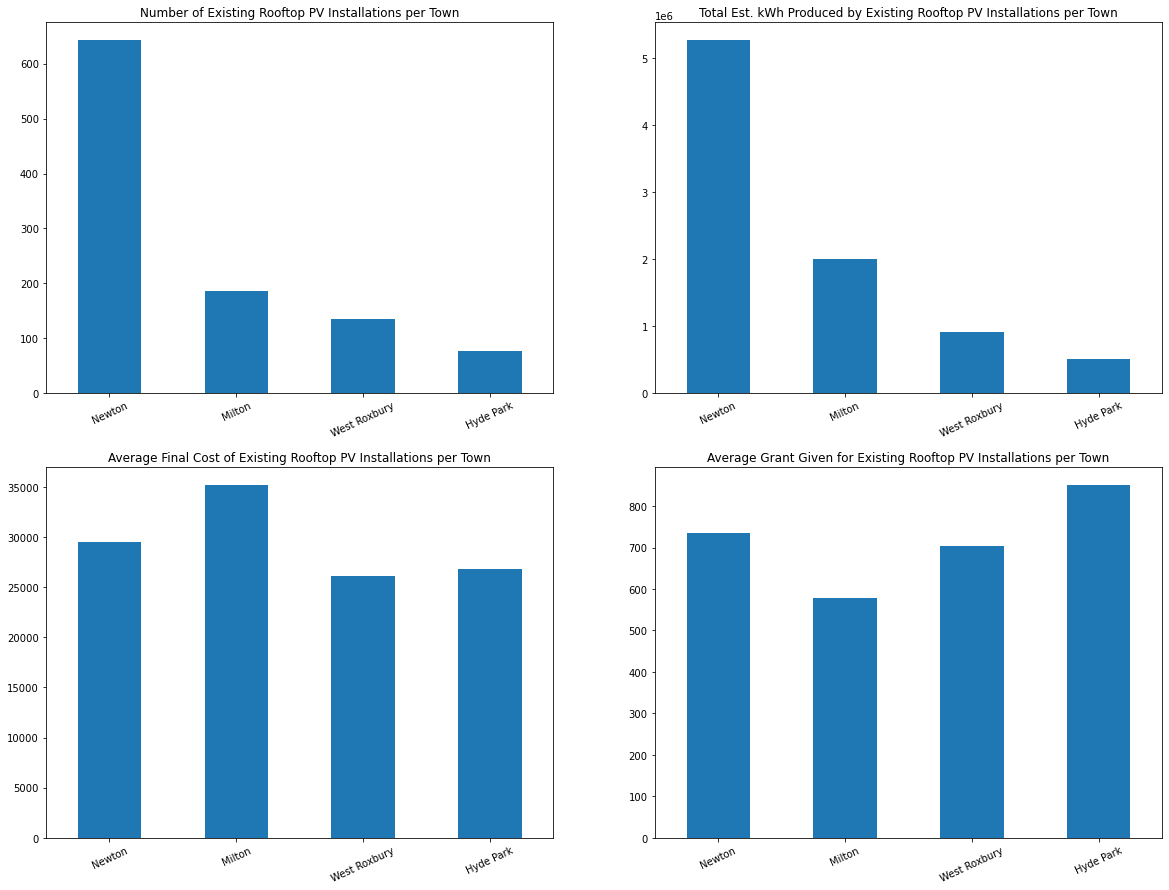

In [39]:
fig1, ax1 = plt.subplots(2, 2)
fig1.set_size_inches(20, 15)

# Plotting N per town

existPVSummary['N'].plot(kind='bar', ax=ax1[0][0])
ax1[0][0].set_xticklabels(labels=ax1[0][0].get_xticklabels(), rotation=25)
ax1[0][0].set_title('Number of Existing Rooftop PV Installations per Town')

# Plotting sumkWhProd per town

existPVSummary['sumkWhProd'].plot(kind='bar', ax=ax1[0][1])
ax1[0][1].set_xticklabels(labels=ax1[0][1].get_xticklabels(), rotation=25)
ax1[0][1].set_title('Total Est. kWh Produced by Existing Rooftop PV Installations per Town')

# Plotting avgFinalCost per town

existPVSummary['avgFinalCost'].plot(kind='bar', ax=ax1[1][0])
ax1[1][0].set_xticklabels(labels=ax1[1][0].get_xticklabels(), rotation=25)
ax1[1][0].set_title('Average Final Cost of Existing Rooftop PV Installations per Town')

# Plotting avgGrant per town

existPVSummary['avgGrant'].plot(kind='bar', ax=ax1[1][1])
ax1[1][1].set_xticklabels(labels=ax1[1][1].get_xticklabels(), rotation=25)
ax1[1][1].set_title('Average Grant Given for Existing Rooftop PV Installations per Town')

# Save image

plt.savefig(outputDir('viz/existingPVBars.png'), dpi=150, format='png')

# *********************** TODO: add bar labels? ******************************

#### Maps

In [26]:
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
182,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
0,02456,NEWTON,AGG,NEWTON,NA,NEWTON,MIDDLESEX,NA,4.642158e+07,39827.270302,"POLYGON ((226479.461 896012.738, 226638.357 89..."
1,02186,MILTON,AGG,NEWTON,NA,"MILTON, TOWN OF",NORFOLK,NA,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
2,02136,HYDE PARK,AGG,HYDE PARK,NA,BOSTON,SUFFOLK,NA,1.151738e+07,19882.474830,"POLYGON ((232240.744 891613.733, 232285.605 89..."


In [21]:
isolMA = isolMA.set_index(pd.Index(['West Roxbury', 'Newton', 'Milton',
                                    'Hyde Park']))
isolMA

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
West Roxbury,02132,WEST ROXBURY,NON UNIQUE,WEST ROXBURY,77710,BOSTON,SUFFOLK,5.35025,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
Newton,02456,NEWTON,AGG,NEWTON,NA,NEWTON,MIDDLESEX,NA,4.642158e+07,39827.270302,"POLYGON ((226479.461 896012.738, 226638.357 89..."
Milton,02186,MILTON,AGG,NEWTON,NA,"MILTON, TOWN OF",NORFOLK,NA,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
Hyde Park,02136,HYDE PARK,AGG,HYDE PARK,NA,BOSTON,SUFFOLK,NA,1.151738e+07,19882.474830,"POLYGON ((232240.744 891613.733, 232285.605 89..."


In [22]:
# Don't need some of these columns to merge with existPVSummary

isolMA = isolMA[['CITY_TOWN', 'COUNTY', 'SHAPE_AREA', 
                       'SHAPE_LEN', 'geometry']]
isolMA

,CITY_TOWN,COUNTY,SHAPE_AREA,SHAPE_LEN,geometry
West Roxbury,BOSTON,SUFFOLK,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89..."
Newton,NEWTON,MIDDLESEX,4.642158e+07,39827.270302,"POLYGON ((226479.461 896012.738, 226638.357 89..."
Milton,"MILTON, TOWN OF",NORFOLK,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132...."
Hyde Park,BOSTON,SUFFOLK,1.151738e+07,19882.474830,"POLYGON ((232240.744 891613.733, 232285.605 89..."


In [23]:
isolMA.to_file(dataDir('MAshape/isolMA.shp'))

In [24]:
townsPV = isolMA.join(existPVSummary)
townsPV

,CITY_TOWN,COUNTY,SHAPE_AREA,SHAPE_LEN,geometry,N,sumkWcap,sumListCost,avgListCost,sumGrant,avgGrant,sumFinalCost,avgFinalCost,sumkWhProd
West Roxbury,BOSTON,SUFFOLK,1.385708e+07,20667.534565,"POLYGON ((228383.530 894158.085, 228431.914 89...",135,797.94,3625356.19,26854.49,94890.65,702.89,3530465.54,26151.60,915356.55
Newton,NEWTON,MIDDLESEX,4.642158e+07,39827.270302,"POLYGON ((226479.461 896012.738, 226638.357 89...",643,4571.36,19430099.70,30217.88,472893.30,735.45,18957206.40,29482.44,5268484.96
Milton,"MILTON, TOWN OF",NORFOLK,3.444044e+07,34990.841095,"MULTIPOLYGON (((237121.538 891977.684, 237132....",186,1759.30,6655654.33,35783.09,107707.75,579.07,6547946.58,35204.01,2005277.72
Hyde Park,BOSTON,SUFFOLK,1.151738e+07,19882.474830,"POLYGON ((232240.744 891613.733, 232285.605 89...",77,446.39,2128237.35,27639.45,65527.25,851.00,2062710.10,26788.44,504067.82


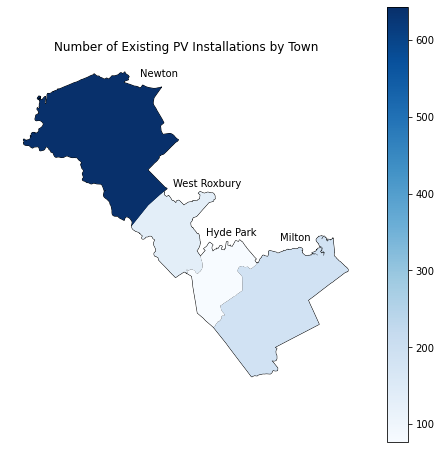

In [25]:
fig2, ax2 = plt.subplots()
fig2.set_size_inches(8, 8)

townsPV.plot(ax=ax2, color='None', edgecolor='black')
townsPV.plot('N', ax=ax2, cmap='Blues', legend=True)

# Town labels
ax2.text(226000, 901650, 'Newton')
ax2.text(228000, 895000, 'West Roxbury')
ax2.text(230000, 892000, 'Hyde Park')
ax2.text(234500, 891700, 'Milton')

ax2.set_title('Number of Existing PV Installations by Town')
ax2.set_axis_off()

# Save image
plt.savefig(outputDir('viz/existPVNumMap.png'), dpi=150, format='png')

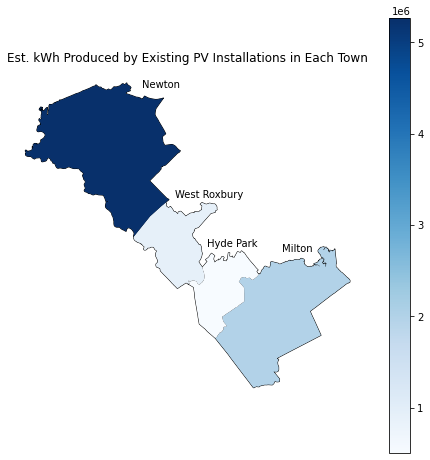

In [26]:
fig3, ax3 = plt.subplots()
fig3.set_size_inches(8, 8)

townsPV.plot(ax=ax3, color='None', edgecolor='black')
townsPV.plot('sumkWhProd', ax=ax3, cmap='Blues', legend=True)

# Town labels
ax3.text(226000, 901650, 'Newton')
ax3.text(228000, 895000, 'West Roxbury')
ax3.text(230000, 892000, 'Hyde Park')
ax3.text(234500, 891700, 'Milton')

ax3.set_title('Est. kWh Produced by Existing PV Installations in Each Town')
ax3.set_axis_off()

# Save image
plt.savefig(outputDir('viz/existPVkWhMap.png'), dpi=150, format='png')

### Rooftops

In [51]:
# Read files from MassGIS

roofsBoston = gpd.read_file(dataDir('roofprintsBoston/structures_poly_35.shp'))
roofsNewton = gpd.read_file(dataDir('roofprintsNewton/structures_poly_207.shp'))
roofsMilton = gpd.read_file(dataDir('roofprintsMilton/structures_poly_189.shp'))

In [52]:
# Need to isolate just the rooftops in West Roxbury and Hyde Park from the
# Boston file
# TEMPORARY - while unable to replicate QGIS command in Python:

roofsWRHP = gpd.read_file(dataDir('intersections/roofprints/roofprintsWRHP.shp')).to_crs('EPSG:4326')

In [53]:
# Change CRS to match

roofsNewton = roofsNewton.to_crs('EPSG:4326')
roofsMilton = roofsMilton.to_crs('EPSG:4326')

In [54]:
# Join all the roof layers

roofs = gpd.GeoDataFrame(pd.concat([roofsWRHP, roofsNewton, roofsMilton], 
                                   ignore_index=True), crs=roofsWRHP.crs)
roofs

,STRUCT_ID,SOURCE,SOURCETYPE,SOURCEDATE,SOURCEDATA,MOVED,AREA_SQ_FT,TOWN_ID,TOWN_ID2,TOWN_ID3,...,COMMENTS,SHAPE_AREA,SHAPE_LEN,index,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AR_1,SHAPE_LEN_,geometry
0,228564_891904,City of Boston,None,0,None,None,524.705830,35,0,0,...,None,48.746962,28.159181,West Roxbury,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((-71.15372 42.27713, -71.15366 42.277..."
1,228744_891768,City of Boston,None,0,None,None,1235.985434,35,0,0,...,None,114.827263,46.526850,West Roxbury,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((-71.15152 42.27592, -71.15150 42.275..."
2,228721_891681,City of Boston,None,0,None,None,1281.687169,35,0,0,...,None,119.073111,46.638050,West Roxbury,BOSTON,SUFFOLK,5.350249,1.385708e+07,20667.534565,"POLYGON ((-71.15184 42.27513, -71.15183 42.275..."
3,229467_887834,City of Boston,None,0,None,None,1107.685557,35,0,0,...,None,102.907767,46.288994,Hyde Park,BOSTON,SUFFOLK,4.440987,1.150210e+07,19976.953687,"POLYGON ((-71.14295 42.24045, -71.14295 42.240..."
4,229842_887062,City of Boston,None,0,None,None,1235.355673,35,0,0,...,None,114.768757,58.090992,Hyde Park,BOSTON,SUFFOLK,4.440987,1.150210e+07,19976.953687,"POLYGON ((-71.13836 42.23341, -71.13835 42.233..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65067,232602_889575,MAGIS,ROOFPRINT,20190400,USGS 2019 15CM ORTHO,None,3318.360000,189,0,0,...,None,308.286070,86.863620,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-71.10502 42.25603, -71.10494 42.256..."
65068,233037_889542,MAGIS,ROOFPRINT,20190400,USGS 2019 15CM ORTHO,None,2043.410000,189,0,0,...,None,189.839404,71.438004,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-71.09964 42.25556, -71.09974 42.255..."
65069,233261_889588,MAGIS,ROOFPRINT,20190400,USGS 2019 15CM ORTHO,None,1100.700000,189,0,0,...,None,102.258020,41.962124,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-71.09689 42.25599, -71.09698 42.256..."
65070,234126_889280,MAGIS,ROOFPRINT,20190400,USGS 2019 15CM ORTHO,None,1562.920000,189,0,0,...,None,145.200496,49.541960,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-71.08648 42.25316, -71.08655 42.253..."


#### Processing Tax Parcel Data

In [118]:
# Read polygons

parcelsNewton = gpd.read_file(dataDir('parcels/L3_SHP_M207_Newton/M207TaxPar_CY21_FY22.shp'))
parcelsMilton = gpd.read_file(dataDir('parcels/L3_SHP_M189_Milton/M189TaxPar_CY21_FY21.shp'))
parcelsBoston = gpd.read_file(dataDir('parcels/L3_SHP_M035_Boston/M035TaxPar_CY20_FY20.shp'))

In [72]:
def dbf_to_csv(from_files, to_files):
    
    for i in range(len(from_files)):
        
        table = agate.Table.from_dbf(from_files[i])
        table.to_csv(to_files[i])

In [73]:
# Read assessor files for each town, which include use codes for each parcel

files_in = [dataDir('parcels/L3_SHP_M207_Newton/M207Assess_CY21_FY22.dbf'),
            dataDir('parcels/L3_SHP_M189_Milton/M189Assess_CY21_FY21.dbf'),
            dataDir('parcels/L3_SHP_M035_Boston/M035Assess_CY20_FY20.dbf')]

files_out = [dataDir('parcels/L3_SHP_M207_Newton/M207Assess.csv'),
             dataDir('parcels/L3_SHP_M189_Milton/M189Assess.csv'),
             dataDir('parcels/L3_SHP_M035_Boston/M035Assess.csv')]

dbf_to_csv(files_in, files_out)

In [119]:
assessNewton = pd.read_csv(files_out[0])
assessMilton = pd.read_csv(files_out[1])
assessBoston = pd.read_csv(files_out[2])

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (21,23) have mixed types.Specify dtype option on import or set low_memory=False.


In [115]:
# List of residential use codes, from MassGIS documentation

# Note: extracting only the 'mixed use - primarily residential' or 
# fully residential codes and the IMPUTED - residential codes (estimates)

# Note: does not include apartments

res = ['013', '014', '016', '017', '018', '019', '101', '102', '104', '105', 
       '109', '0130', '0140', '0160', '0170', '0180', '0190', '1010', '1020', 
       '1040', '1050', '110', '1100', '113', '1130', '114', '1140', '116', 
       '1160', '117', '1170', '118', '1180', '119', '1190', '120', '1200', 
       '126', '1260', '127', '1270', '108', '1080', '128', '1280', '129', 
       '1290', '152', '1520']

In [75]:
assessNewton.columns

Index(['PROP_ID', 'LOC_ID', 'BLDG_VAL', 'LAND_VAL', 'OTHER_VAL', 'TOTAL_VAL',
       'FY', 'LOT_SIZE', 'LS_DATE', 'LS_PRICE', 'USE_CODE', 'SITE_ADDR',
       'ADDR_NUM', 'FULL_STR', 'LOCATION', 'CITY', 'ZIP', 'OWNER1', 'OWN_ADDR',
       'OWN_CITY', 'OWN_STATE', 'OWN_ZIP', 'OWN_CO', 'LS_BOOK', 'LS_PAGE',
       'REG_ID', 'ZONING', 'YEAR_BUILT', 'BLD_AREA', 'UNITS', 'RES_AREA',
       'STYLE', 'STORIES', 'NUM_ROOMS', 'LOT_UNITS', 'CAMA_ID', 'TOWN_ID'],
      dtype='object')

In [120]:
resNewton = assessNewton[assessNewton['USE_CODE'].isin(res)]
resMilton = assessMilton[assessMilton['USE_CODE'].isin(res)]
resBoston = assessBoston[assessBoston['USE_CODE'].isin(res)]

In [121]:
# Give the parcel polygons data and the residential assessment data
# a common index

parcelsNewton = parcelsNewton.set_index('LOC_ID')
parcelsMilton = parcelsMilton.set_index('LOC_ID')
parcelsBoston = parcelsBoston.set_index('LOC_ID')

resNewton = resNewton.set_index('LOC_ID')
resMilton = resMilton.set_index('LOC_ID')
resBoston = resBoston.set_index('LOC_ID')

In [122]:
# Drop the 'TOWN_ID' columns from the residential assessment data (overlap)

resNewton = resNewton.drop(columns=['TOWN_ID'])
resMilton = resMilton.drop(columns=['TOWN_ID'])
resBoston = resBoston.drop(columns=['TOWN_ID'])

In [123]:
# Join the data

resParcNewton = parcelsNewton.join(resNewton)
resParcMilton = parcelsMilton.join(resMilton)
resParcBoston = parcelsBoston.join(resBoston)

In [107]:
resParcBoston['ZIP'].value_counts()

2127.0    11643
2135.0    10170
2130.0     9105
2132.0     8921
2124.0     8783
2136.0     7604
2131.0     7551
2116.0     7534
2118.0     6876
2128.0     6820
2129.0     5732
2125.0     5587
2122.0     4768
2114.0     4265
2115.0     3916
2126.0     3811
2119.0     3552
2134.0     3473
2121.0     2990
2215.0     2697
2111.0     2266
2110.0     1699
2113.0     1682
2108.0     1522
2109.0     1325
2210.0     1243
2120.0     1229
2467.0      970
2199.0       23
2446.0       10
2445.0        6
2026.0        5
Name: ZIP, dtype: int64

In [164]:
# Extract residential parcels in West Roxbury and Hyde Park only

resParcWRHP = resParcBoston[resParcBoston['ZIP'].isin([2132, 2136])]
resParcWRHP

,SHAPE_Leng,SHAPE_Area,MAP_PAR_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,LAST_EDIT,BND_CHK,NO_MATCH,...,ZONING,YEAR_BUILT,BLD_AREA,UNITS,RES_AREA,STYLE,STORIES,NUM_ROOMS,LOT_UNITS,CAMA_ID
LOC_ID,,,,,,,,,,,,,,,,,,,,,
F_744304_2926683,102.299212,625.893958,2009222001,FEE,20,ASSESS,None,20191107,None,N,...,NaN,1960.0,0.0,0.0,1570.0,Colonial,2.0,6.0,A,1115509.0
F_744473_2926389,156.861410,1516.718232,2009237000,FEE,20,ASSESS,None,20191107,None,N,...,NaN,1900.0,0.0,0.0,826.0,Conventional,1.5,5.0,A,1115528.0
F_744552_2926328,146.314923,1237.430499,2009238000,FEE,20,ASSESS,None,20191107,None,N,...,NaN,2003.0,6822.0,0.0,5450.0,DAY CARE CENTER,1.0,0.0,A,1115529.0
F_744586_2926501,109.756155,700.400645,2009219001,FEE,20,ASSESS,None,20191107,None,N,...,NaN,0.0,0.0,0.0,0.0,Two Fam Stack,NaN,0.0,A,1115506.0
F_744599_2926252,93.904634,554.839186,2009239010,FEE,20,ASSESS,None,20191107,None,N,...,NaN,2004.0,0.0,1.0,1710.0,Town House,4.0,6.0,A,1146667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F_764886_2921189,80.648214,369.203468,1801273000,FEE,18,ASSESS,None,20191107,None,N,...,NaN,1930.0,0.0,0.0,1296.0,Colonial,2.0,7.0,A,1085957.0
F_764896_2921427,110.675475,599.151903,1801239000,FEE,18,ASSESS,None,20191107,None,N,...,NaN,1910.0,0.0,0.0,1888.0,Colonial,2.0,6.0,A,1085923.0
F_764928_2921390,114.955189,646.339524,1801238000,FEE,18,ASSESS,None,20191107,None,N,...,NaN,1915.0,0.0,0.0,1560.0,Cape,1.5,8.0,A,1085922.0


In [165]:
# Ensure correct CRS for all

resParcNewton = resParcNewton.to_crs('EPSG:4326')
resParcMilton = resParcMilton.to_crs('EPSG:4326')
resParcWRHP   = resParcWRHP.to_crs('EPSG:4326')

In [166]:
# Finally, join the residential parcels into one dataframe

resParcels = gpd.GeoDataFrame(pd.concat([resParcNewton, resParcMilton, 
                                         resParcWRHP], ignore_index=True), 
                              crs=resParcNewton.crs)

In [167]:
resParcels.to_file(dataDir('parcels/res/residentialParcels.shp'))

#### Isolating Residential Rooftops

In [215]:
# TEMPORARY - read file outputted from QGIS Vector intersection

resRoofs = gpd.read_file(dataDir('roofsResidential/resRoofs.shp'))

In [216]:
len(resRoofs)

105653

There are some duplicates.

In [217]:
resRoofs['STRUCT_ID'].value_counts()

226335_896812    423
226378_896756    423
226378_896786    423
226435_896871    423
232064_891175    204
                ... 
225318_897019      1
226877_898250      1
232102_888900      1
236010_888776      1
226826_900582      1
Name: STRUCT_ID, Length: 62799, dtype: int64

In [218]:
resRoofs = resRoofs.drop_duplicates(subset=['STRUCT_ID'])

In [219]:
print(len(resRoofs))
print('\n')

print(len(test[test['index'].eq('Newton')]))
print(len(test[test['index'].eq('Milton')]))
print(len(test[test['index'].eq('West Roxbury')]))
print(len(test[test['index'].eq('Hyde Park')]))

62799


28860
11413
11873
10653


It now seems plausible that we have at least a realistic accounting of the residential rooftops in the study locations.

<AxesSubplot:>

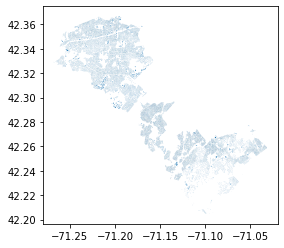

In [220]:
resRoofs.plot()

In [230]:
# Save files

resRoofs.to_file(dataDir('roofsResidential/resRoofs_scrubbed.shp'))

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


### Solar Potential

#### How the Towns Compare Overall

In [5]:
isolMA.crs = 'EPSG:26986'

In [6]:
solarshp = isolMA.to_crs('EPSG:4326')           # solar data is in EPSG:4326 
solarshp.to_file(dataDir('MAshape/solar.shp'))  # saving this to use in QGIS

In [7]:
from_filepath = dataDir('irradiation2/USA_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas/western-hemisphere/PVOUT.tif')
to_filepath   = dataDir('irradiation2/USA_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas/western-hemisphere/solarPot.tif')

command = ['gdalwarp', 
           '-r', 'average',
            '-te', '-71.300', '42.170', '-71.000', '42.375',
           '-te_srs', 'EPSG:4326',
           '-of', 'GTiff',
           from_filepath, to_filepath]

Popen(command).wait()

1

In [8]:
solar_file = r_open(to_filepath)
solar = solar_file.read(1).astype(np.float32)

extent = [solar_file.bounds[i] for i in [0, 2, 1, 3]]

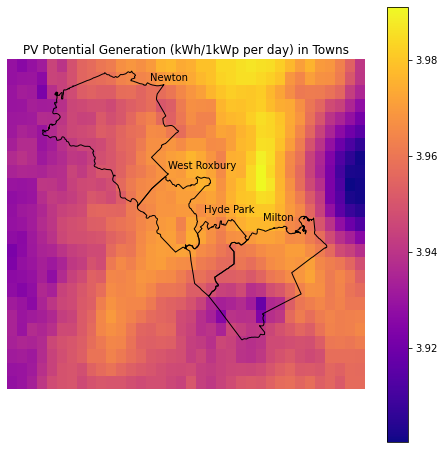

In [10]:
fig4, ax4 = plt.subplots()
fig4.set_size_inches(8, 8)

img = ax4.imshow(solar, extent=extent, cmap='plasma')
plt.colorbar(img)

solarshp.plot(ax=ax4, color='None', edgecolor='black')

# Town labels
ax4.text(-71.180, 42.362, 'Newton')
ax4.text(-71.165, 42.307, 'West Roxbury')
ax4.text(-71.135, 42.280, 'Hyde Park')
ax4.text(-71.085, 42.275, 'Milton')

ax4.set_title('PV Potential Generation (kWh/1kWp per day) in Towns')
ax4.set_axis_off()

# Save image
plt.savefig(outputDir('viz/PVOUTtowns.png'), dpi=150, format='png')

#### Adding a Rooftop Layer

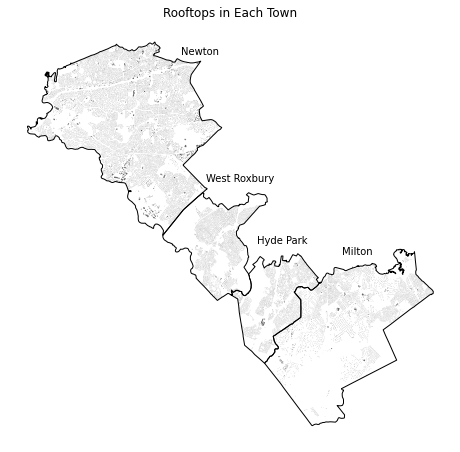

In [252]:
fig5, ax5 = plt.subplots()
fig5.set_size_inches(8, 8)

resRoofs.plot(ax=ax5, color='dimgray')
solarshp.plot(ax=ax5, color='None', edgecolor='black')

# Town labels
ax5.text(-71.180, 42.362, 'Newton')
ax5.text(-71.165, 42.307, 'West Roxbury')
ax5.text(-71.135, 42.280, 'Hyde Park')
ax5.text(-71.085, 42.275, 'Milton')

ax5.set_title('Rooftops in Each Town')
ax5.set_axis_off()

# Save image
plt.savefig(outputDir('viz/roofs.png'), dpi=150, format='png')

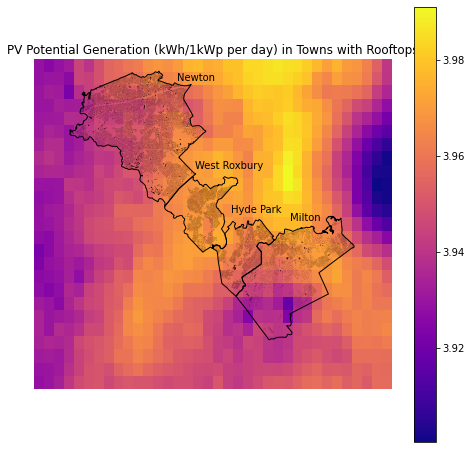

In [197]:
fig6, ax6 = plt.subplots()
fig6.set_size_inches(8, 8)

img = ax6.imshow(solar, extent=extent, cmap='plasma')
plt.colorbar(img)

resRoofs.plot(ax=ax6, color='black')
solarshp.plot(ax=ax6, color='None', edgecolor='black')

# Town labels
ax6.text(-71.180, 42.362, 'Newton')
ax6.text(-71.165, 42.307, 'West Roxbury')
ax6.text(-71.135, 42.280, 'Hyde Park')
ax6.text(-71.085, 42.275, 'Milton')

ax6.set_title('PV Potential Generation (kWh/1kWp per day) in Towns with Rooftops')
ax6.set_axis_off()

# Save image
plt.savefig(outputDir('viz/PVOUTtownsRoofs.png'), dpi=150, format='png')

#### Solar Energy Potential per Rooftop

In [198]:
path = to_filepath

solarzs    = zonal_stats(resRoofs, path, stats=['mean'], all_touched=True, nodata=-1)
roofsSolar = pd.DataFrame(solarzs, index=resRoofs.index)

In [231]:
# Store the zonal stats data in a new column
resRoofs['PV_kWh/kWp'] = roofsSolar['mean']

# Calculate the number of 320-Watt panels (17.5 ft^2 ea) that can fit on each roof
resRoofs['n_320Wp'] = resRoofs['AREA_SQ_FT'] / 17.5

# Calculate the approximate daily potential of each rooftop
resRoofs['potentkWh/day'] = ((resRoofs['n_320Wp'] * 320) / 1000) * resRoofs['PV_kWh/kWp']

# Calculate the yearly potential
resRoofs['potentkWh/yr'] = resRoofs['potentkWh/day'] * 365
resRoofs

,STRUCT_ID,TOWN_ID,TOWN_ID2,LOCAL_ID,AREA_SQ_FT,index,CITY_TOWN,COUNTY,SHAPE_Leng,SHAPE_Area,...,STYLE,STORIES,NUM_ROOMS,LOT_UNITS,CAMA_ID,geometry,potentkWh/day,potentkWh/yr,PV_kWh/kWp,n_320Wp
0,228564_891904,35,0,Bos_2003474000_B1,524.705830,West Roxbury,BOSTON,SUFFOLK,114.155068,782.326050,...,Colonial,2.0,7.0,A,1108776.0,"POLYGON ((-71.15372 42.27713, -71.15372 42.277...",38.085848,13901.334608,3.9695,29.983190
2,228744_891768,35,0,Bos_2003510000_B0,1235.985434,West Roxbury,BOSTON,SUFFOLK,104.729084,691.195591,...,Colonial,2.0,8.0,A,1108813.0,"POLYGON ((-71.15152 42.27592, -71.15150 42.275...",89.578575,32696.179702,3.9635,70.627739
3,228721_891681,35,0,Bos_2003527000_B0,1281.687169,West Roxbury,BOSTON,SUFFOLK,85.278469,397.988532,...,Bungalow,1.0,6.0,A,1108830.0,"POLYGON ((-71.15184 42.27513, -71.15183 42.275...",92.890827,33905.152015,3.9635,73.239267
4,229467_887834,35,0,Bos_1812932003_B0,1107.685557,Hyde Park,BOSTON,SUFFOLK,151.865554,970.920798,...,Cape,1.5,9.0,A,1098527.0,"POLYGON ((-71.14295 42.24045, -71.14295 42.240...",80.168583,29261.532722,3.9580,63.296318
5,229842_887062,35,0,Bos_1812996000_B0,1235.355673,Hyde Park,BOSTON,SUFFOLK,180.346405,1303.656445,...,Conventional,1.0,6.0,A,1098600.0,"POLYGON ((-71.13836 42.23341, -71.13835 42.233...",89.295745,32592.946968,3.9530,70.591753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105647,232602_889575,189,0,None,3318.360000,Milton,"MILTON, TOWN OF",NORFOLK,228.659630,3459.567644,...,CONTEMPORY,2.0,10.0,A,1600.0,"POLYGON ((-71.10502 42.25603, -71.10494 42.256...",240.408539,87749.116662,3.9620,189.620571
105648,233037_889542,189,0,None,2043.410000,Milton,"MILTON, TOWN OF",NORFOLK,186.784090,1923.121348,...,SPLIT LEVL,1.0,7.0,A,1582.0,"POLYGON ((-71.09964 42.25556, -71.09974 42.255...",148.078335,54048.592312,3.9630,116.766286
105649,233261_889588,189,0,None,1100.700000,Milton,"MILTON, TOWN OF",NORFOLK,89.353638,466.285186,...,COLONIAL,2.0,7.0,A,686.0,"POLYGON ((-71.09689 42.25599, -71.09698 42.256...",79.763642,29113.729285,3.9630,62.897143
105651,234126_889280,189,0,None,1562.920000,Milton,"MILTON, TOWN OF",NORFOLK,101.507622,625.938725,...,COLONIAL,2.0,8.0,A,2784.0,"POLYGON ((-71.08648 42.25316, -71.08655 42.253...",113.344747,41370.832613,3.9660,89.309714


In [232]:
# Convert kWh to kW over the course of a year (divide by hours of sunlight)
resRoofs['potent_kW'] = resRoofs['potentkWh/yr'] / 2739

resRoofs

,STRUCT_ID,TOWN_ID,TOWN_ID2,LOCAL_ID,AREA_SQ_FT,index,CITY_TOWN,COUNTY,SHAPE_Leng,SHAPE_Area,...,STORIES,NUM_ROOMS,LOT_UNITS,CAMA_ID,geometry,potentkWh/day,potentkWh/yr,PV_kWh/kWp,n_320Wp,potent_kW
0,228564_891904,35,0,Bos_2003474000_B1,524.705830,West Roxbury,BOSTON,SUFFOLK,114.155068,782.326050,...,2.0,7.0,A,1108776.0,"POLYGON ((-71.15372 42.27713, -71.15372 42.277...",38.085848,13901.334608,3.9695,29.983190,5.075332
2,228744_891768,35,0,Bos_2003510000_B0,1235.985434,West Roxbury,BOSTON,SUFFOLK,104.729084,691.195591,...,2.0,8.0,A,1108813.0,"POLYGON ((-71.15152 42.27592, -71.15150 42.275...",89.578575,32696.179702,3.9635,70.627739,11.937269
3,228721_891681,35,0,Bos_2003527000_B0,1281.687169,West Roxbury,BOSTON,SUFFOLK,85.278469,397.988532,...,1.0,6.0,A,1108830.0,"POLYGON ((-71.15184 42.27513, -71.15183 42.275...",92.890827,33905.152015,3.9635,73.239267,12.378661
4,229467_887834,35,0,Bos_1812932003_B0,1107.685557,Hyde Park,BOSTON,SUFFOLK,151.865554,970.920798,...,1.5,9.0,A,1098527.0,"POLYGON ((-71.14295 42.24045, -71.14295 42.240...",80.168583,29261.532722,3.9580,63.296318,10.683291
5,229842_887062,35,0,Bos_1812996000_B0,1235.355673,Hyde Park,BOSTON,SUFFOLK,180.346405,1303.656445,...,1.0,6.0,A,1098600.0,"POLYGON ((-71.13836 42.23341, -71.13835 42.233...",89.295745,32592.946968,3.9530,70.591753,11.899579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105647,232602_889575,189,0,None,3318.360000,Milton,"MILTON, TOWN OF",NORFOLK,228.659630,3459.567644,...,2.0,10.0,A,1600.0,"POLYGON ((-71.10502 42.25603, -71.10494 42.256...",240.408539,87749.116662,3.9620,189.620571,32.036917
105648,233037_889542,189,0,None,2043.410000,Milton,"MILTON, TOWN OF",NORFOLK,186.784090,1923.121348,...,1.0,7.0,A,1582.0,"POLYGON ((-71.09964 42.25556, -71.09974 42.255...",148.078335,54048.592312,3.9630,116.766286,19.732965
105649,233261_889588,189,0,None,1100.700000,Milton,"MILTON, TOWN OF",NORFOLK,89.353638,466.285186,...,2.0,7.0,A,686.0,"POLYGON ((-71.09689 42.25599, -71.09698 42.256...",79.763642,29113.729285,3.9630,62.897143,10.629328
105651,234126_889280,189,0,None,1562.920000,Milton,"MILTON, TOWN OF",NORFOLK,101.507622,625.938725,...,2.0,8.0,A,2784.0,"POLYGON ((-71.08648 42.25316, -71.08655 42.253...",113.344747,41370.832613,3.9660,89.309714,15.104357


In [233]:
resRoofs.columns

Index(['STRUCT_ID', 'TOWN_ID', 'TOWN_ID2', 'LOCAL_ID', 'AREA_SQ_FT', 'index',
       'CITY_TOWN', 'COUNTY', 'SHAPE_Leng', 'SHAPE_Area', 'MAP_PAR_ID',
       'POLY_TYPE', 'MAP_NO', 'SOURCE', 'PLAN_ID', 'LAST_EDIT', 'BND_CHK',
       'NO_MATCH', 'TOWN_ID_2', 'PROP_ID', 'BLDG_VAL', 'LAND_VAL', 'OTHER_VAL',
       'TOTAL_VAL', 'FY', 'LOT_SIZE', 'LS_DATE', 'LS_PRICE', 'USE_CODE',
       'SITE_ADDR', 'ADDR_NUM', 'FULL_STR', 'LOCATION', 'CITY', 'ZIP',
       'OWNER1', 'OWN_ADDR', 'OWN_CITY', 'OWN_STATE', 'OWN_ZIP', 'OWN_CO',
       'LS_BOOK', 'LS_PAGE', 'REG_ID', 'ZONING', 'YEAR_BUILT', 'BLD_AREA',
       'UNITS', 'RES_AREA', 'STYLE', 'STORIES', 'NUM_ROOMS', 'LOT_UNITS',
       'CAMA_ID', 'geometry', 'potentkWh/day', 'potentkWh/yr', 'PV_kWh/kWp',
       'n_320Wp', 'potent_kW'],
      dtype='object')

In [235]:
# Rename some columns to have <10 characters

resRoofs['pot_kWh/day'] = resRoofs['potentkWh/day']
resRoofs['pot_kWh/yr']  = resRoofs['potentkWh/yr']

### Financial Data

#### Block Group Income Data for Areas of Interest

<AxesSubplot:>

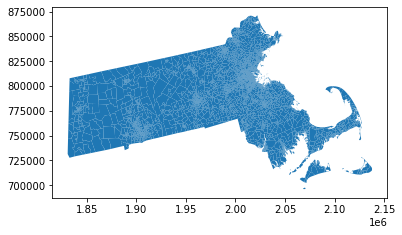

In [29]:
incomeMAshp = gpd.read_file(dataDir('incomeMAShape/MA_blck_grp_2019.shp'))
incomeMAdat = pd.read_csv(dataDir('incomeMA/nhgis0001_ds244_20195_blck_grp.csv'))

incomeMAshp.plot()

In [5]:
incomeMAshp.crs

<Projected CRS: PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GE ...>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [30]:
# Change CRS to EPSG:4326

incomeMAshp = incomeMAshp.to_crs('EPSG:4326')
incomeMAshp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
# Save for use in QGIS (below)

incomeMAshp.to_file(dataDir('incomeMAShape/incomeMA_reproj.shp'))

In [32]:
# Isolate just the income block groups in the study locations
# TEMPORARY - while unable to replicate QGIS command in Python:

isolIncomeMAshp = gpd.read_file(dataDir('intersections/income/isolIncome.shp'))

In [55]:
isolIncomeMAshp.columns

Index(['GISJOIN', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'GEOID',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'Shape_Leng', 'Shape_Area', 'index', 'CITY_TOWN', 'COUNTY',
       'SHAPE_AR_1', 'SHAPE_LEN', 'geometry'],
      dtype='object')

In [56]:
incomeMAdat.columns

Index(['GISJOIN', 'YEAR', 'STUSAB', 'REGIONA', 'DIVISIONA', 'STATE', 'STATEA',
       'COUNTY', 'COUNTYA', 'COUSUBA', 'PLACEA', 'TRACTA', 'BLKGRPA',
       'CONCITA', 'AIANHHA', 'RES_ONLYA', 'TRUSTA', 'AIHHTLI', 'AITS', 'ANRCA',
       'CBSAA', 'CSAA', 'METDIVA', 'MEMI', 'NECTAA', 'CNECTAA', 'NECTADIVA',
       'UAA', 'CDCURRA', 'SLDUA', 'SLDLA', 'ZCTA5A', 'SUBMCDA', 'SDELMA',
       'SDSECA', 'SDUNIA', 'UR', 'PCI', 'PUMA5A', 'GEOID', 'BTTRA', 'BTBGA',
       'NAME_E', 'ALW0E001', 'ALW0E002', 'ALW0E003', 'ALW0E004', 'ALW0E005',
       'ALW0E006', 'ALW0E007', 'ALW0E008', 'ALW0E009', 'ALW0E010', 'ALW0E011',
       'ALW0E012', 'ALW0E013', 'ALW0E014', 'ALW0E015', 'ALW0E016', 'ALW0E017',
       'NAME_M', 'ALW0M001', 'ALW0M002', 'ALW0M003', 'ALW0M004', 'ALW0M005',
       'ALW0M006', 'ALW0M007', 'ALW0M008', 'ALW0M009', 'ALW0M010', 'ALW0M011',
       'ALW0M012', 'ALW0M013', 'ALW0M014', 'ALW0M015', 'ALW0M016', 'ALW0M017'],
      dtype='object')

<AxesSubplot:>

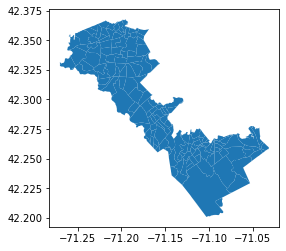

In [70]:
isolIncomeMAshp.plot()

In [57]:
incomeMAdat['GISJOIN'].isin(isolIncomeMAshp['GISJOIN']).sum()

196

In [62]:
isolIncomeMAshp['GISJOIN'].value_counts()

G25002104161021    2
G25002501402012    2
G25002501402011    2
G25002501404003    2
G25002501401024    2
                  ..
G25002104164007    1
G25001703733001    1
G25002501404005    1
G25002501301006    1
G25002104172006    1
Name: GISJOIN, Length: 196, dtype: int64

In [33]:
# Cross-reference the isolated block groups by GISJOIN to get the
# numerical data from the dat file

def filterBlockGroups(blocksShape, blocksDat):
    
    # Create a filter for the matching ids
    f = blocksDat['GISJOIN'].isin(blocksShape['GISJOIN'])
    
    # Apply the filter to the data object & save the matching rows
    filteredDat = blocksDat[f]
    
    # Change the index of the filtered data and shape data to match
    filteredDat = filteredDat.set_index('GISJOIN')
    shapes      = blocksShape.set_index('GISJOIN')
    
    finalData = shapes.join(filteredDat, lsuffix='_shape', rsuffix='_numer')
    return finalData

In [34]:
isolBlocks = filterBlockGroups(isolIncomeMAshp, incomeMAdat)

In [328]:
isolBlocks.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'GEOID_shape', 'NAMELSAD',
       'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'Shape_Leng', 'Shape_Area', 'index', 'CITY_TOWN', 'COUNTY_shape',
       'SHAPE_AR_1', 'SHAPE_LEN', 'geometry', 'YEAR', 'STUSAB', 'REGIONA',
       'DIVISIONA', 'STATE', 'STATEA', 'COUNTY_numer', 'COUNTYA', 'COUSUBA',
       'PLACEA', 'TRACTA', 'BLKGRPA', 'CONCITA', 'AIANHHA', 'RES_ONLYA',
       'TRUSTA', 'AIHHTLI', 'AITS', 'ANRCA', 'CBSAA', 'CSAA', 'METDIVA',
       'MEMI', 'NECTAA', 'CNECTAA', 'NECTADIVA', 'UAA', 'CDCURRA', 'SLDUA',
       'SLDLA', 'ZCTA5A', 'SUBMCDA', 'SDELMA', 'SDSECA', 'SDUNIA', 'UR', 'PCI',
       'PUMA5A', 'GEOID_numer', 'BTTRA', 'BTBGA', 'NAME_E', 'ALW0E001',
       'ALW0E002', 'ALW0E003', 'ALW0E004', 'ALW0E005', 'ALW0E006', 'ALW0E007',
       'ALW0E008', 'ALW0E009', 'ALW0E010', 'ALW0E011', 'ALW0E012', 'ALW0E013',
       'ALW0E014', 'ALW0E015', 'ALW0E016', 'ALW0E017', 'NAME_M', 'ALW0M001',
       'ALW0M00

In [35]:
# Drop unneeded columns

isolBlocks = isolBlocks[['GEOID_shape', 'GEOID_numer', 'STUSAB', 
                         'COUNTY_shape', 'COUNTY_numer', 'TRACTA', 'BLKGRPA', 
                         'NAME_E', 'NAME_M',
                         'ALW0E001', 'ALW0E002', 'ALW0E003', 'ALW0E004',
                         'ALW0E005', 'ALW0E006', 'ALW0E007','ALW0E008',
                         'ALW0E009', 'ALW0E010', 'ALW0E011', 'ALW0E012',
                         'ALW0E013', 'ALW0E014', 'ALW0E015', 'ALW0E016',
                         'ALW0E017', 'ALW0M001', 'ALW0M002', 'ALW0M003',
                         'ALW0M004', 'ALW0M005', 'ALW0M006', 'ALW0M007', 
                         'ALW0M008', 'ALW0M009', 'ALW0M010', 'ALW0M011',            
                         'ALW0M012', 'ALW0M013', 'ALW0M014', 'ALW0M015',
                         'ALW0M016', 'ALW0M017', 'geometry']]

In [236]:
isolBlocks

,GISJOIN,GEOID_shap,GEOID_nume,STUSAB,COUNTY_sha,COUNTY_num,TRACTA,BLKGRPA,NAME_E,NAME_M,...,ALW0M013,ALW0M014,ALW0M015,ALW0M016,ALW0M017,wAvgInc_l,wAvgInc_u,stateIncT,fedIncT,geometry
0,G25001703672002,250173672002,15000US250173672002,MA,MIDDLESEX,Middlesex County,367200,2,"Block Group 2, Census Tract 3672, Middlesex Co...","Block Group 2, Census Tract 3672, Middlesex Co...",...,12,12,38,45,78,114964.72,125549.71,5748.24,27591.53,"MULTIPOLYGON (((-71.25601 42.34019, -71.25588 ..."
1,G25001703684003,250173684003,15000US250173684003,MA,MIDDLESEX,Middlesex County,368400,3,"Block Group 3, Census Tract 3684, Middlesex Co...","Block Group 3, Census Tract 3684, Middlesex Co...",...,87,61,63,33,25,84617.71,104677.92,4230.89,20308.25,"POLYGON ((-71.25783 42.35448, -71.25825 42.354..."
2,G25001703686001,250173686001,15000US250173686001,MA,MIDDLESEX,Middlesex County,368600,1,"Block Group 1, Census Tract 3686, Middlesex Co...","Block Group 1, Census Tract 3686, Middlesex Co...",...,72,28,12,41,28,81389.89,99475.62,4069.49,17905.78,"POLYGON ((-71.22707 42.36362, -71.22732 42.363..."
3,G25001703686004,250173686004,15000US250173686004,MA,MIDDLESEX,Middlesex County,368600,4,"Block Group 4, Census Tract 3686, Middlesex Co...","Block Group 4, Census Tract 3686, Middlesex Co...",...,80,35,44,86,55,88786.22,105566.41,4439.31,21308.69,"POLYGON ((-71.24457 42.35843, -71.24484 42.358..."
4,G25001703687002,250173687002,15000US250173687002,MA,MIDDLESEX,Middlesex County,368700,2,"Block Group 2, Census Tract 3687, Middlesex Co...","Block Group 2, Census Tract 3687, Middlesex Co...",...,24,81,22,16,43,73316.73,84580.78,3665.84,16129.68,"MULTIPOLYGON (((-71.21751 42.36645, -71.21834 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,G25002501404007,250251404007,15000US250251404007,MA,SUFFOLK,Suffolk County,140400,7,"Block Group 7, Census Tract 1404, Suffolk Coun...","Block Group 7, Census Tract 1404, Suffolk Coun...",...,103,26,12,40,12,52488.80,65972.45,2624.44,6298.66,"MULTIPOLYGON (((-71.11908 42.27256, -71.11909 ..."
212,G25002509807001,250259807001,15000US250259807001,MA,SUFFOLK,Suffolk County,980700,1,"Block Group 1, Census Tract 9807, Suffolk Coun...","Block Group 1, Census Tract 9807, Suffolk Coun...",...,12,12,12,12,12,0.00,0.00,0.00,0.00,"POLYGON ((-71.14065 42.27518, -71.14069 42.274..."
213,G25002509807001,250259807001,15000US250259807001,MA,SUFFOLK,Suffolk County,980700,1,"Block Group 1, Census Tract 9807, Suffolk Coun...","Block Group 1, Census Tract 9807, Suffolk Coun...",...,12,12,12,12,12,0.00,0.00,0.00,0.00,"MULTIPOLYGON (((-71.13173 42.27343, -71.13112 ..."
214,G25002509810001,250259810001,15000US250259810001,MA,SUFFOLK,Suffolk County,981000,1,"Block Group 1, Census Tract 9810, Suffolk Coun...","Block Group 1, Census Tract 9810, Suffolk Coun...",...,12,12,12,12,12,0.00,0.00,0.00,0.00,"POLYGON ((-71.12988 42.29806, -71.12989 42.298..."


#### From Income Ranges to Weighted Averages

In [36]:
def rangeToAvg(data):
    
    prefix = 'ALW0E0'
    
    # Column names (NHGIS codes) with corresponding income ranges:
    # Note: treating "below $10k" and "above $200k" as "$10k" and "$200k"
    
    totCode = prefix + '01'
    
    incomeCodesRanges = {
        prefix+'02': (9999, 9999),
        prefix+'03': (10000, 14999),
        prefix+'04': (15000, 19999),
        prefix+'05': (20000, 24999),
        prefix+'06': (25000, 29999),
        prefix+'07': (30000, 34999),
        prefix+'08': (35000, 39999),
        prefix+'09': (40000, 44999),
        prefix+'10': (45000, 49999),
        prefix+'11': (50000, 59999),
        prefix+'12': (60000, 74999),
        prefix+'13': (75000, 99999),
        prefix+'14': (100000, 124999),
        prefix+'15': (125000, 149999),
        prefix+'16': (150000, 199999),
        prefix+'17': (200000, 200000)   
    }
    
    # Save the weighted averages in lists to add as new columns to the data:
    
    wAvgs_l = []
    wAvgs_u = []
    
    for index, row in data.iterrows():
        
        wAvg_lower = 0
        wAvg_upper = 0
        
        N = row[totCode]   # total no. of households in ea. block
            
        for code in incomeCodesRanges:
                    
            n = row[code]  # no. in income range
            
            wAvg_lower += n * incomeCodesRanges[code][0]
            wAvg_upper += n * incomeCodesRanges[code][1]
                                    
        
        # Some blocks have no household data:
        
        if(N == 0):
            wAvg_lower = 0
            wAvg_upper = 0
            
        else:
            wAvg_lower = round(wAvg_lower / N, 2)
            wAvg_upper = round(wAvg_upper / N, 2)
            
        wAvgs_l.append(wAvg_lower)
        wAvgs_u.append(wAvg_upper)
    
    return wAvgs_l, wAvgs_u

In [37]:
res = rangeToAvg(isolBlocks)

isolBlocks['wAvgInc_l'] = res[0]
isolBlocks['wAvgInc_u'] = res[1]

In [332]:
isolBlocks

,GEOID_shape,GEOID_numer,STUSAB,COUNTY_shape,COUNTY_numer,TRACTA,BLKGRPA,NAME_E,NAME_M,ALW0E001,...,ALW0M011,ALW0M012,ALW0M013,ALW0M014,ALW0M015,ALW0M016,ALW0M017,geometry,wAvgIncome_lower,wAvgIncome_upper
GISJOIN,,,,,,,,,,,,,,,,,,,,,
G25001703672002,250173672002,15000US250173672002,MA,MIDDLESEX,Middlesex County,367200,2,"Block Group 2, Census Tract 3672, Middlesex Co...","Block Group 2, Census Tract 3672, Middlesex Co...",427,...,44,12,12,12,38,45,78,"MULTIPOLYGON (((-71.25601 42.34019, -71.25588 ...",114964.72,125549.71
G25001703684003,250173684003,15000US250173684003,MA,MIDDLESEX,Middlesex County,368400,3,"Block Group 3, Census Tract 3684, Middlesex Co...","Block Group 3, Census Tract 3684, Middlesex Co...",654,...,91,91,87,61,63,33,25,"POLYGON ((-71.25783 42.35448, -71.25825 42.354...",84617.71,104677.92
G25001703686001,250173686001,15000US250173686001,MA,MIDDLESEX,Middlesex County,368600,1,"Block Group 1, Census Tract 3686, Middlesex Co...","Block Group 1, Census Tract 3686, Middlesex Co...",277,...,31,44,72,28,12,41,28,"POLYGON ((-71.22707 42.36362, -71.22732 42.363...",81389.89,99475.62
G25001703686004,250173686004,15000US250173686004,MA,MIDDLESEX,Middlesex County,368600,4,"Block Group 4, Census Tract 3686, Middlesex Co...","Block Group 4, Census Tract 3686, Middlesex Co...",758,...,12,37,80,35,44,86,55,"POLYGON ((-71.24457 42.35843, -71.24484 42.358...",88786.22,105566.41
G25001703687002,250173687002,15000US250173687002,MA,MIDDLESEX,Middlesex County,368700,2,"Block Group 2, Census Tract 3687, Middlesex Co...","Block Group 2, Census Tract 3687, Middlesex Co...",502,...,30,45,24,81,22,16,43,"MULTIPOLYGON (((-71.21751 42.36645, -71.21834 ...",73316.73,84580.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G25002501404007,250251404007,15000US250251404007,MA,SUFFOLK,Suffolk County,140400,7,"Block Group 7, Census Tract 1404, Suffolk Coun...","Block Group 7, Census Tract 1404, Suffolk Coun...",452,...,70,94,103,26,12,40,12,"MULTIPOLYGON (((-71.11908 42.27256, -71.11909 ...",52488.80,65972.45
G25002509807001,250259807001,15000US250259807001,MA,SUFFOLK,Suffolk County,980700,1,"Block Group 1, Census Tract 9807, Suffolk Coun...","Block Group 1, Census Tract 9807, Suffolk Coun...",0,...,12,12,12,12,12,12,12,"POLYGON ((-71.14065 42.27518, -71.14069 42.274...",0.00,0.00
G25002509807001,250259807001,15000US250259807001,MA,SUFFOLK,Suffolk County,980700,1,"Block Group 1, Census Tract 9807, Suffolk Coun...","Block Group 1, Census Tract 9807, Suffolk Coun...",0,...,12,12,12,12,12,12,12,"MULTIPOLYGON (((-71.13173 42.27343, -71.13112 ...",0.00,0.00


#### State & Federal Income Tax Estimates

In [38]:
# MA has a flat income tax rate of 5%
# In addition, there are 7 federal tax brackets. Values below assume
# head of household tax brackets in 2019.

def getIncomeTax(data):

    taxMAFactor = 0.05
    taxFedRange = [[0, 13850], [13851, 52850], [52851, 84200], [84201, 160700],
                  [160701, 204700], [204701, 510300], [204701, 510300]]

    taxFedFactors = [0.1, 0.12, 0.22, 0.24, 0.32, 0.35, 0.37]
    
    taxesMA  = []
    taxesFed = []
    
    # Using lower weighted average income estimate
    
    for index, row in data.iterrows():
        
        income = row['wAvgInc_l']
        
        # MA
        taxMA = round(taxMAFactor * income, 2)
        taxesMA.append(taxMA)
        
        # Federal
        taxFed = 0
        
        for i in range(len(taxFedRange)):
            
            if (income >= taxFedRange[i][0]) & (income <= taxFedRange[i][1]):
                taxFed = round(taxFedFactors[i] * income, 2)
                taxesFed.append(taxFed)
                
    return taxesMA, taxesFed

In [39]:
res = getIncomeTax(isolBlocks)

isolBlocks['stateIncT'] = res[0]
isolBlocks['fedIncT']   = res[1]

isolBlocks

,GEOID_shape,GEOID_numer,STUSAB,COUNTY_shape,COUNTY_numer,TRACTA,BLKGRPA,NAME_E,NAME_M,ALW0E001,...,ALW0M013,ALW0M014,ALW0M015,ALW0M016,ALW0M017,geometry,wAvgInc_l,wAvgInc_u,stateIncT,fedIncT
GISJOIN,,,,,,,,,,,,,,,,,,,,,
G25001703672002,250173672002,15000US250173672002,MA,MIDDLESEX,Middlesex County,367200,2,"Block Group 2, Census Tract 3672, Middlesex Co...","Block Group 2, Census Tract 3672, Middlesex Co...",427,...,12,12,38,45,78,"MULTIPOLYGON (((-71.25601 42.34019, -71.25588 ...",114964.72,125549.71,5748.24,27591.53
G25001703684003,250173684003,15000US250173684003,MA,MIDDLESEX,Middlesex County,368400,3,"Block Group 3, Census Tract 3684, Middlesex Co...","Block Group 3, Census Tract 3684, Middlesex Co...",654,...,87,61,63,33,25,"POLYGON ((-71.25783 42.35448, -71.25825 42.354...",84617.71,104677.92,4230.89,20308.25
G25001703686001,250173686001,15000US250173686001,MA,MIDDLESEX,Middlesex County,368600,1,"Block Group 1, Census Tract 3686, Middlesex Co...","Block Group 1, Census Tract 3686, Middlesex Co...",277,...,72,28,12,41,28,"POLYGON ((-71.22707 42.36362, -71.22732 42.363...",81389.89,99475.62,4069.49,17905.78
G25001703686004,250173686004,15000US250173686004,MA,MIDDLESEX,Middlesex County,368600,4,"Block Group 4, Census Tract 3686, Middlesex Co...","Block Group 4, Census Tract 3686, Middlesex Co...",758,...,80,35,44,86,55,"POLYGON ((-71.24457 42.35843, -71.24484 42.358...",88786.22,105566.41,4439.31,21308.69
G25001703687002,250173687002,15000US250173687002,MA,MIDDLESEX,Middlesex County,368700,2,"Block Group 2, Census Tract 3687, Middlesex Co...","Block Group 2, Census Tract 3687, Middlesex Co...",502,...,24,81,22,16,43,"MULTIPOLYGON (((-71.21751 42.36645, -71.21834 ...",73316.73,84580.78,3665.84,16129.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G25002501404007,250251404007,15000US250251404007,MA,SUFFOLK,Suffolk County,140400,7,"Block Group 7, Census Tract 1404, Suffolk Coun...","Block Group 7, Census Tract 1404, Suffolk Coun...",452,...,103,26,12,40,12,"MULTIPOLYGON (((-71.11908 42.27256, -71.11909 ...",52488.80,65972.45,2624.44,6298.66
G25002509807001,250259807001,15000US250259807001,MA,SUFFOLK,Suffolk County,980700,1,"Block Group 1, Census Tract 9807, Suffolk Coun...","Block Group 1, Census Tract 9807, Suffolk Coun...",0,...,12,12,12,12,12,"POLYGON ((-71.14065 42.27518, -71.14069 42.274...",0.00,0.00,0.00,0.00
G25002509807001,250259807001,15000US250259807001,MA,SUFFOLK,Suffolk County,980700,1,"Block Group 1, Census Tract 9807, Suffolk Coun...","Block Group 1, Census Tract 9807, Suffolk Coun...",0,...,12,12,12,12,12,"MULTIPOLYGON (((-71.13173 42.27343, -71.13112 ...",0.00,0.00,0.00,0.00


In [40]:
isolBlocks.to_file(dataDir('incomeALL/incomeBlocksGeometries.shp'))

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


#### Visualizing Financial Data

<AxesSubplot:>

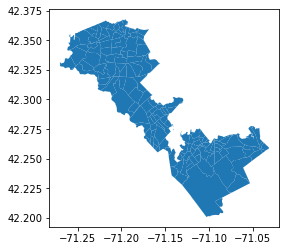

In [67]:
isolBlocks[isolBlocks['wAvgInc_l'].gt(0.0)].plot()

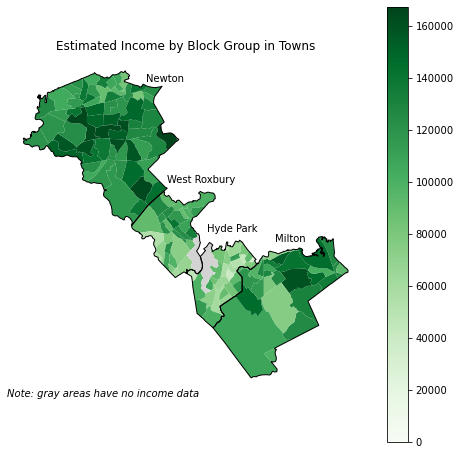

In [238]:
fig7, ax7 = plt.subplots()
fig7.set_size_inches(8, 8)

isolBlocks.plot('wAvgInc_l', ax=ax7, cmap='Greens', legend=True)
isolBlocks[isolBlocks['wAvgInc_l'].eq(0.0)].plot(ax=ax7, color='lightgray')
isolMA.to_crs('EPSG:4326').plot(ax=ax7, color='None', edgecolor='black')

# Town labels
ax7.text(-71.180, 42.362, 'Newton')
ax7.text(-71.165, 42.307, 'West Roxbury')
ax7.text(-71.135, 42.280, 'Hyde Park')
ax7.text(-71.085, 42.275, 'Milton')

x = ax7.get_xlim()[0]
y = ax7.get_ylim()[0] - 0.002
    
ax7.text(x, y, 'Note: gray areas have no income data', style='italic')

ax7.set_title('Estimated Income by Block Group in Towns')
ax7.set_axis_off()

# Save image
plt.savefig(outputDir('viz/incomeBlocks.png'), dpi=150, format='png')

#### Combining Block Groups & Rooftop Irradiance Data

In [239]:
# roofs = gpd.read_file(dataDir('roofsResidential/resRoofs_scrubbed.shp'))
# isolBlocks = gpd.read_file(dataDir('incomeALL/incomeBlocksGeometries.shp'))

In [241]:
# Execute a spatial join of the residential rooftop/PVOUT data and the
# block group income data

joinRoofsBlocks = gpd.sjoin(resRoofs, isolBlocks, how='left')
joinRoofsBlocks

,STRUCT_ID,TOWN_ID,TOWN_ID2,LOCAL_ID,AREA_SQ_FT,index,CITY_TOWN,COUNTY,SHAPE_Leng,SHAPE_Area,...,ALW0M012,ALW0M013,ALW0M014,ALW0M015,ALW0M016,ALW0M017,wAvgInc_l,wAvgInc_u,stateIncT,fedIncT
0,228564_891904,35,0,Bos_2003474000_B1,524.705830,West Roxbury,BOSTON,SUFFOLK,114.155068,782.326050,...,23,33,65,14,50,41,122698.96,143978.48,6134.95,29447.75
2,228744_891768,35,0,Bos_2003510000_B0,1235.985434,West Roxbury,BOSTON,SUFFOLK,104.729084,691.195591,...,23,33,65,14,50,41,122698.96,143978.48,6134.95,29447.75
3,228721_891681,35,0,Bos_2003527000_B0,1281.687169,West Roxbury,BOSTON,SUFFOLK,85.278469,397.988532,...,23,33,65,14,50,41,122698.96,143978.48,6134.95,29447.75
4,229467_887834,35,0,Bos_1812932003_B0,1107.685557,Hyde Park,BOSTON,SUFFOLK,151.865554,970.920798,...,9,50,17,55,31,51,114557.15,131788.90,5727.86,27493.72
5,229842_887062,35,0,Bos_1812996000_B0,1235.355673,Hyde Park,BOSTON,SUFFOLK,180.346405,1303.656445,...,19,57,38,34,31,35,99979.08,118817.14,4998.95,23994.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105647,232602_889575,189,0,None,3318.360000,Milton,"MILTON, TOWN OF",NORFOLK,228.659630,3459.567644,...,12,67,27,73,57,65,118273.92,133574.65,5913.70,28385.74
105648,233037_889542,189,0,None,2043.410000,Milton,"MILTON, TOWN OF",NORFOLK,186.784090,1923.121348,...,85,53,128,40,83,50,97230.77,118835.62,4861.54,23335.38
105649,233261_889588,189,0,None,1100.700000,Milton,"MILTON, TOWN OF",NORFOLK,89.353638,466.285186,...,85,53,128,40,83,50,97230.77,118835.62,4861.54,23335.38
105651,234126_889280,189,0,None,1562.920000,Milton,"MILTON, TOWN OF",NORFOLK,101.507622,625.938725,...,12,30,22,17,42,64,126930.05,138403.67,6346.50,30463.21


In [247]:
# Remove unnecessary columns

joinRoofsBlocks = joinRoofsBlocks[[
    'STRUCT_ID', 'TOWN_ID', 'TOWN_ID2', 'LOCAL_ID', 'AREA_SQ_FT', 'index', 
    'CITY_TOWN', 'COUNTY', 'BLDG_VAL', 'LAND_VAL', 'OTHER_VAL', 'TOTAL_VAL',
    'USE_CODE', 'ZONING', 'YEAR_BUILT', 'BLD_AREA', 'UNITS', 'RES_AREA', 
    'STYLE', 'STORIES', 'NUM_ROOMS', 'GISJOIN', 'NAME_E', 'NAME_M', 
    'geometry', 'PV_kWh/kWp', 'n_320Wp', 'pot_kWh/day', 'pot_kWh/yr', 
    'potent_kW', 'wAvgInc_l', 'wAvgInc_u', 'stateIncT', 'fedIncT'
]]

### Avoided Emissions

The EPA reported in 2019 that the NEWE region, which includes Massachusetts, has an output emission rate of 780.6 pounds of carbon dioxide equivalent (CO2e) per Mega-Watt hour (MWh) of electricity production and consumption (table 3 of eGRID2019).

In [248]:
joinRoofsBlocks['emAvo_lbs'] = (joinRoofsBlocks['pot_kWh/yr'] / 1000) * 780.6
joinRoofsBlocks

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,STRUCT_ID,TOWN_ID,TOWN_ID2,LOCAL_ID,AREA_SQ_FT,index,CITY_TOWN,COUNTY,BLDG_VAL,LAND_VAL,...,PV_kWh/kWp,n_320Wp,pot_kWh/day,pot_kWh/yr,potent_kW,wAvgInc_l,wAvgInc_u,stateIncT,fedIncT,emAvo_lbs
0,228564_891904,35,0,Bos_2003474000_B1,524.705830,West Roxbury,BOSTON,SUFFOLK,295400.0,261900.0,...,3.9695,29.983190,38.085848,13901.334608,5.075332,122698.96,143978.48,6134.95,29447.75,10851.381795
2,228744_891768,35,0,Bos_2003510000_B0,1235.985434,West Roxbury,BOSTON,SUFFOLK,360300.0,225900.0,...,3.9635,70.627739,89.578575,32696.179702,11.937269,122698.96,143978.48,6134.95,29447.75,25522.637876
3,228721_891681,35,0,Bos_2003527000_B0,1281.687169,West Roxbury,BOSTON,SUFFOLK,342000.0,155400.0,...,3.9635,73.239267,92.890827,33905.152015,12.378661,122698.96,143978.48,6134.95,29447.75,26466.361663
4,229467_887834,35,0,Bos_1812932003_B0,1107.685557,Hyde Park,BOSTON,SUFFOLK,240700.0,194200.0,...,3.9580,63.296318,80.168583,29261.532722,10.683291,114557.15,131788.90,5727.86,27493.72,22841.552443
5,229842_887062,35,0,Bos_1812996000_B0,1235.355673,Hyde Park,BOSTON,SUFFOLK,473447.0,0.0,...,3.9530,70.591753,89.295745,32592.946968,11.899579,99979.08,118817.14,4998.95,23994.98,25442.054403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105647,232602_889575,189,0,None,3318.360000,Milton,"MILTON, TOWN OF",NORFOLK,1495900.0,493600.0,...,3.9620,189.620571,240.408539,87749.116662,32.036917,118273.92,133574.65,5913.70,28385.74,68496.960466
105648,233037_889542,189,0,None,2043.410000,Milton,"MILTON, TOWN OF",NORFOLK,230500.0,327300.0,...,3.9630,116.766286,148.078335,54048.592312,19.732965,97230.77,118835.62,4861.54,23335.38,42190.331159
105649,233261_889588,189,0,None,1100.700000,Milton,"MILTON, TOWN OF",NORFOLK,316200.0,327100.0,...,3.9630,62.897143,79.763642,29113.729285,10.629328,97230.77,118835.62,4861.54,23335.38,22726.177080
105651,234126_889280,189,0,None,1562.920000,Milton,"MILTON, TOWN OF",NORFOLK,541400.0,395200.0,...,3.9660,89.309714,113.344747,41370.832613,15.104357,126930.05,138403.67,6346.50,30463.21,32294.071937


In [249]:
# Finally, the data are analysis-ready. Reorder the columns and save to file:

joinRoofsBlocks = joinRoofsBlocks[[
    'STRUCT_ID', 'TOWN_ID', 'TOWN_ID2', 'LOCAL_ID', 'AREA_SQ_FT', 'index', 
    'CITY_TOWN', 'COUNTY', 'BLDG_VAL', 'LAND_VAL', 'OTHER_VAL', 'TOTAL_VAL',
    'USE_CODE', 'ZONING', 'YEAR_BUILT', 'BLD_AREA', 'UNITS', 'RES_AREA', 
    'STYLE', 'STORIES', 'NUM_ROOMS', 'GISJOIN', 'NAME_E', 'NAME_M', 
    'geometry', 'PV_kWh/kWp', 'n_320Wp', 'pot_kWh/day', 'pot_kWh/yr', 
    'potent_kW', 'wAvgInc_l', 'wAvgInc_u', 'stateIncT', 'fedIncT', 'emAvo_lbs'
]]

joinRoofsBlocks.to_file(dataDir('analysisReady/roofsSolarIncomeTaxesEmissions.shp'))

/home/lucia/miniconda3/envs/gis/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


In [291]:
# TODO: 
#   1. Redo bar plots (2.2.1) to fit on a single page
#   2. Redo QGIS intersections in Python (2.3.2, )